0
132
0
Taken: 1
0


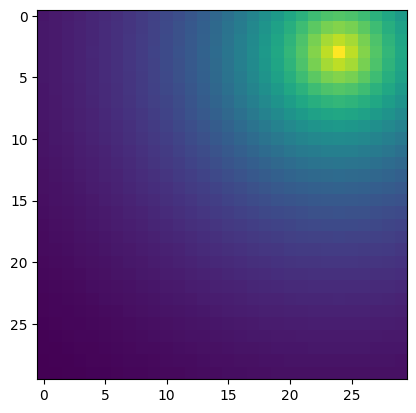

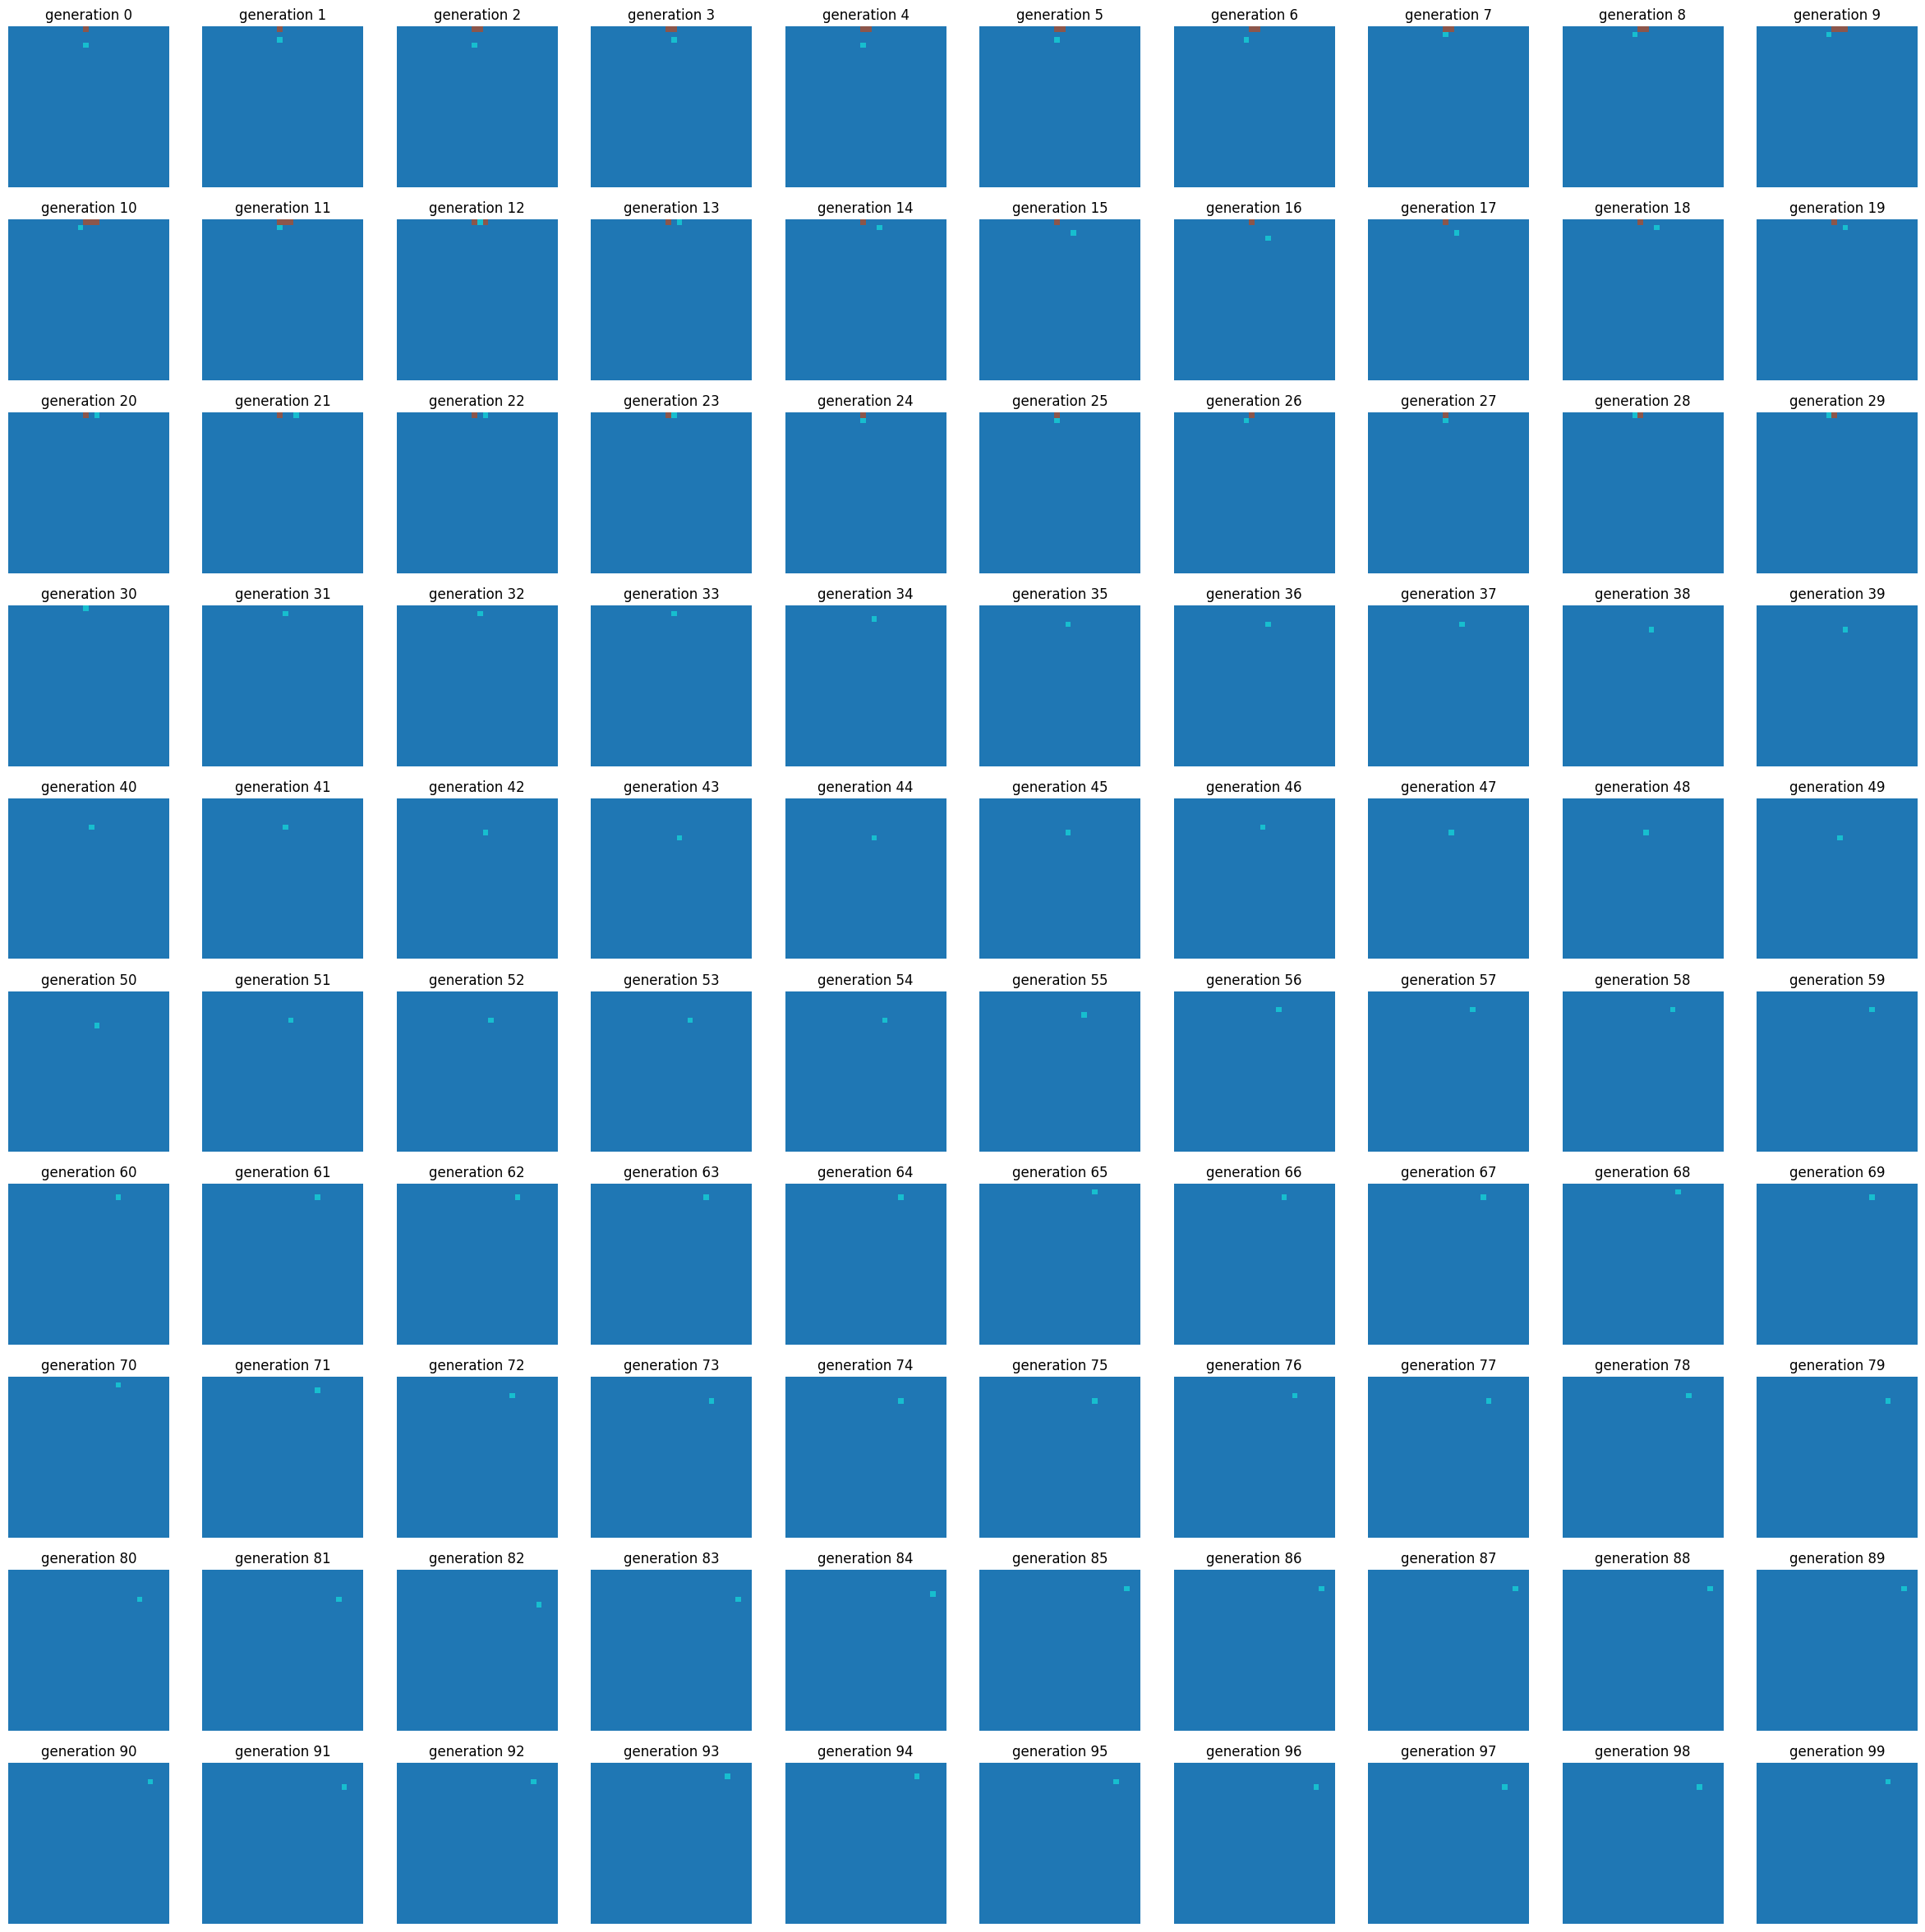

In [1]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states

init_config = {'stalk_cells': [Point(0,14)],
                'tip_cells': [Point(14,3)],
               #'attractor_cells': initial_states.Attractors_small3
               }
grid = Grid(width=30, height=30, init_config=init_config)
engine = Engine(init_grid=grid, generations=100)
engine.run()
engine.visualize()

In [ ]:
engine.visualize()

In [9]:
import matplotlib.pyplot as plt
def generate_concentration_gradient(source_location, matrix_size, decay_rate, initial_concentration):
    """
    Generates a matrix representing the concentration gradient from a single source
    
    Parameters:
        - source_location (tuple): The (x, y) coordinates of the source
        - matrix_size (int): The size of the matrix (matrix is square, so this is the width and height)
        - decay_rate (float): The rate at which the concentration decreases as distance from the source increases
        - initial_concentration (float): The concentration of the source
        
    Returns:
        - concentration_matrix (2D numpy array): The matrix representing the concentration gradient
    """
    x, y = source_location
    concentration_matrix = np.zeros((matrix_size, matrix_size))
    for i in range(matrix_size):
        for j in range(matrix_size):
            distance = ((i - x) ** 2 + (j - y) ** 2) ** 0.5
            concentration = initial_concentration * np.exp(-decay_rate * distance)
            concentration_matrix[i, j] = concentration
    return concentration_matrix

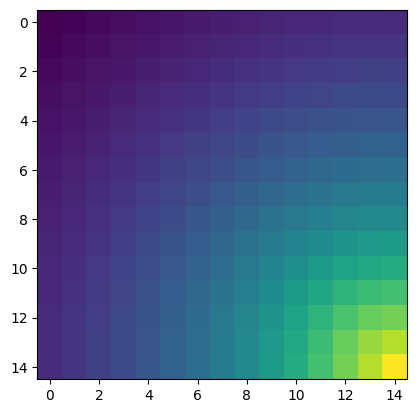

In [13]:
source_location = (14, 14)
matrix_size = 15
decay_rate = 0.1
initial_concentration = 2

concentration_matrix = generate_concentration_gradient(source_location, matrix_size, decay_rate, initial_concentration)
plt.imshow(concentration_matrix)